# Introduction
In this notebook, we will be discussing the relationship between Educational Attainment (2014-2018) and Household Income (2018) for Los Angeles County.

We will begin by importing Census data found on Social Explorer for Educational Attainment (2014-2018) and Household Income (2018) for LA County.

In [5]:
import pandas as pd

In [6]:
education = pd.read_csv('data/Educational_Attainment.csv')

Next, we will inspect the data. We will be looking at the shape, first few rows of the dataset, and a sample of the dataset.

In [7]:
education.shape

(2346, 70)

In [8]:
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


In [9]:
education.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
1763,6037553100,14000US06037553100,Census Tract 5531,"Census Tract 5531, Los Angeles County, California",ca,140,0,ACSSF,5633,NaN,...,228,89,9,17.71,21.44,34.67,18.23,5.56,2.17,0.22


Now, we want to look at the different data types in our dataset.

In [10]:
education.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

# Fixing the Leading Zero Dilemma
Next, we will be taking a look at the column that will become Geo_FIPS. We also want to fix the leading zero dilemma by coding the leading "0" in the Geo_FIPS code.

In [12]:
education.Geo_FIPS.head()

0    6037101110
1    6037101122
2    6037101210
3    6037101220
4    6037101300
Name: Geo_FIPS, dtype: int64

In [13]:
education.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [14]:
education.Geo_COUNTY.head()

0    37
1    37
2    37
3    37
4    37
Name: Geo_COUNTY, dtype: int64

We will fix the leading zero error by re-importing the data and specifying the FIPS column as a string. We will also check our work with the .head() code.

In [17]:
education = pd.read_csv(
    'data/Educational_Attainment.csv',
    dtype={'Geo_FIPS':str})

In [18]:
education['Geo_FIPS'] = education['Geo_FIPS'].str.zfill(11)
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


We can confirm our new dataframe with the correct datatypes.

In [19]:
education.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

# Dropping Null Columns
Next, we would like to drop all null columns in our dataset. This includes all empty values.

In [20]:
education.columns[education.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [21]:
education = education.dropna(axis=1,how="all")

In [22]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   int64  
 10  Geo_COUNTY         2346 non-null   int64  
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A12001_001      2346 non-null   int64  
 13  SE_A12001_002      2346 non-null   int64  
 14  SE_A12001_003      2346 non-null   int64  
 15  SE_A12001_004      2346 non-null   int64  
 16  SE_A12001_005      2346 

We re-inspect the data.

In [23]:
education.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,6,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,6,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


Now that we have dropped the columns with empty values, we can go ahead and elimnate columns that we do not need. We begin by listing the columns we do not need.

In [25]:
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

Then we can drop them and check if they are dropped with .head().

In [26]:
education = education.drop(columns_to_drop,axis=1)
education.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,1101,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,888,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,1340,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,769,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,1145,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


# Renaming Columns.
In order to rename our columns, we begin by listing the columns by the names they currently have.

In [27]:
columns = list(education)
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A12001_001',
 'SE_A12001_002',
 'SE_A12001_003',
 'SE_A12001_004',
 'SE_A12001_005',
 'SE_A12001_006',
 'SE_A12001_007',
 'SE_A12001_008',
 'PCT_SE_A12001_002',
 'PCT_SE_A12001_003',
 'PCT_SE_A12001_004',
 'PCT_SE_A12001_005',
 'PCT_SE_A12001_006',
 'PCT_SE_A12001_007',
 'PCT_SE_A12001_008']

We then create an output with the column names we want.

In [28]:
education.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'PopOver25yrs',
 'Less_Than_HS',
 'HS_Graduate',
 'Some_College',
 'Bachelors_Degree',
 'Masters_Degree',
 'Prof_School_Degree',
 'Doctorate_Degree',
 'PCT_Less_Than_HS',
 'PCT_HS_Graduate',
 'PCT_Some_College',
 'PCT_Bachelors_Degree',
 'PCT_Masters_Degree',
 'PCT_Prof_School_Degree',
 'PCT_Doctorate_Degree']

We check to make sure the column names have been changed.

In [29]:
education.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,PopOver25yrs,Less_Than_HS,HS_Graduate,Some_College,...,Masters_Degree,Prof_School_Degree,Doctorate_Degree,PCT_Less_Than_HS,PCT_HS_Graduate,PCT_Some_College,PCT_Bachelors_Degree,PCT_Masters_Degree,PCT_Prof_School_Degree,PCT_Doctorate_Degree
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,1101,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,888,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,1340,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,769,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,1145,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


# Simple Statistics and Plots
Now, we can look at simple statistics of our dataset and begin creating plots.

Here, we can look at basic statistics of the Population over 25 years old in LA county.

In [30]:
education['PopOver25yrs'].head()

0    3085
1    2597
2    4107
3    2484
4    3446
Name: PopOver25yrs, dtype: int64

In [31]:
education['PopOver25yrs'].mean()

2917.940750213129

In [32]:
education['PopOver25yrs'].describe()

count    2346.000000
mean     2917.940750
std      1101.241175
min         0.000000
25%      2194.250000
50%      2819.000000
75%      3611.500000
max      8196.000000
Name: PopOver25yrs, dtype: float64

We will plot a histogram of the Population Over 25 years old in LA County.

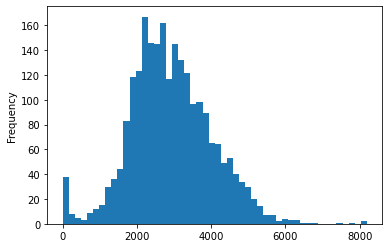

In [33]:
education['PopOver25yrs'].plot.hist(bins=50)

Now that we have looked at some basic statistics, let's look at factors that are more relevant to our research question. We want to find an association between the level of education and household income. Does higher education result in higher household income? 

We will be looking at the census tracts with the highest population of people with Bachelor's Degrees in LA. We start by sorting the data by their respective columns.

In [38]:
education_sorted = education.sort_values(by='Bachelors_Degree', ascending = False)

In [39]:
education_sorted[['Geo_NAME','Bachelors_Degree']].head(10)

,Geo_NAME,Bachelors_Degree
2146,Census Tract 7029.01,3586
2106,Census Tract 7002,3203
922,Census Tract 2756.02,3012
2047,Census Tract 6211.04,2912
2107,Census Tract 7003,2659
2070,Census Tract 6508,2377
1937,Census Tract 5776.03,2359
2133,Census Tract 7020.02,2333
2166,Census Tract 8004.08,2245
2121,Census Tract 7013.02,2244


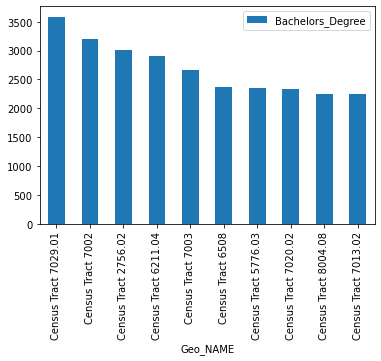

In [40]:
education_sorted.head(10).plot.bar(x='Geo_NAME',
                                   y='Bachelors_Degree')

The chart below shows the Top 10 Census Tracts with the Highest Population in LA County with Bachelor's Degrees.

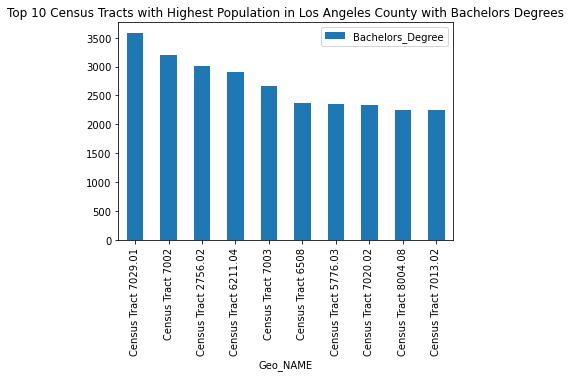

In [41]:
education_sorted.head(10).plot.bar(x='Geo_NAME',
                                  y='Bachelors_Degree',
                                  title='Top 10 Census Tracts with Highest Population in Los Angeles County with Bachelors Degrees')

Next, let's look at the census tracts that have no people with Bachelors Degrees in them.

In [49]:
education_no_pop = education[education['Bachelors_Degree']==0]

In [50]:
print('There are ' +str(len(education_no_pop)) + ' census tracts wsith no people in them')

There are 26 census tracts wsith no people in them


In [51]:
education_no_pop[['Geo_NAME','Bachelors_Degree']]

,Geo_NAME,Bachelors_Degree
1054,Census Tract 3200,0
1521,Census Tract 5041.02,0
1746,Census Tract 5516,0
1905,Census Tract 5755,0
2317,Census Tract 9800.01,0
2318,Census Tract 9800.02,0
2319,Census Tract 9800.03,0
2320,Census Tract 9800.04,0
2321,Census Tract 9800.05,0
2322,Census Tract 9800.06,0


Let's find out how many census tracts have 50% or more people with Bachelor's Degrees.

In [52]:
bachelors50 = education[education['PCT_Bachelors_Degree']>=50]
bachelors50[['Geo_NAME','PCT_Bachelors_Degree']]

,Geo_NAME,PCT_Bachelors_Degree
348,Census Tract 1436.04,53.86
630,Census Tract 2148,53.74
633,Census Tract 2151.01,59.09
637,Census Tract 2163,50.71
700,Census Tract 2247,50.76
862,Census Tract 2674.03,52.36
2044,Census Tract 6210.02,55.59
2045,Census Tract 6210.04,54.26
2047,Census Tract 6211.04,50.95
2121,Census Tract 7013.02,54.63


# Creating Maps
As we begin mapping our dataset, we will be using a geojson file downloaded from the LA Times.

In [53]:
import geopandas as gpd

In [54]:
tracts=gpd.read_file('../../data/la_tracts.geojson')
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


We will look at the details of the dataset, and then we will subset the data.

In [55]:
tracts.info(verbose=True,null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [56]:
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


Rename the columns.

In [57]:
tracts.columns = ['FIPS','geometry']

In [58]:
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


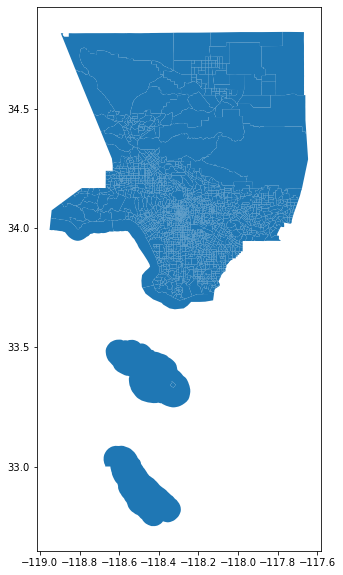

In [39]:
tracts.plot(figsize=(12,10))

Now, we will be merging our data from social explorer with the geojson file.

In [59]:
tracts_education=tracts.merge(education,on="FIPS")

In [60]:
tracts_education.head()

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,PopOver25yrs,Less_Than_HS,HS_Graduate,...,Masters_Degree,Prof_School_Degree,Doctorate_Degree,PCT_Less_Than_HS,PCT_HS_Graduate,PCT_Some_College,PCT_Bachelors_Degree,PCT_Masters_Degree,PCT_Prof_School_Degree,PCT_Doctorate_Degree
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3085,524,765,...,180,50,54,16.99,24.80,35.69,13.32,5.83,1.62,1.75
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2597,168,749,...,248,13,68,6.47,28.84,34.19,17.83,9.55,0.50,2.62
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4107,762,1185,...,174,36,62,18.55,28.85,32.63,13.34,4.24,0.88,1.51
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2484,515,700,...,129,0,24,20.73,28.18,30.96,13.97,5.19,0.00,0.97
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3446,362,949,...,278,82,26,10.50,27.54,33.23,17.53,8.07,2.38,0.75


Now we will produce a map using a Natural Break scheme to represent the distribution of percentage of Bachelor's Degrees across LA County.

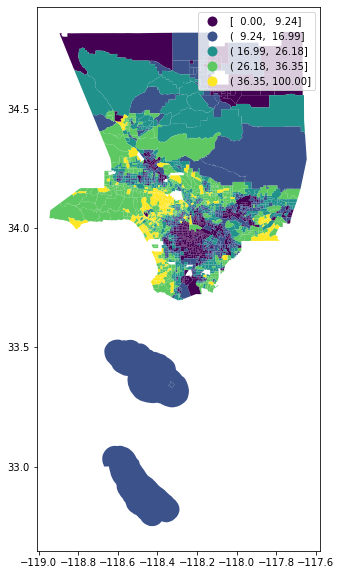

In [61]:
tracts_education.plot(figsize=(12,10),
                 column='PCT_Bachelors_Degree',
                 legend=True, 
                 scheme='NaturalBreaks')

# Analysis and Conclusion
In this map we can see a higher concentration of Bachelor's Degrees more northwest of the county, whereas towards Downtown LA, we can see a lower concentration of a population with Bachelor's Degrees. In comparison to the household income map, we can see a similar trend. Populations with a household income with $200,000 or more are concentrated in areas such as Santa Monica, Brentwood, and the San Fernando Valley. Therefore, we can see a correlation between the level of education attainment and annual income in Los Angeles County.